# Solution for the Final Exam of Math 596: Climate Math 
# Student Name : Bhagyashri Patil
# Red ID Number : 827166204
## December 17, 2021
## Sam Shen's Class

In [ ]:
#Importing all required libraries

import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib.mlab as mlab
import pandas as pd

from mpl_toolkits import mplot3d
from netCDF4 import Dataset as ds
from urllib import request
import scipy as sp
from scipy import stats as stt
from sklearn import datasets, linear_model
from sklearn.neighbors import KernelDensity as kd
from sklearn.linear_model import LinearRegression
from random import randint
from scipy.stats import norm
import statsmodels
import sklearn
import math
import statistics
import sympy as sy
from sympy import symbols, diff
import statsmodels.api as sm
from datetime import date

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Style Dictionary to standarize plotting scheme between different python scripts 
import matplotlib.pyplot as plt

styledict = {'xtick.labelsize':20,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':20,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

***

## Problem 1: Plot global warming data

Figure 1 shows the history of the global average December mean temperature anomalies. Use Python
and the dataset EarthTemperatureData.txt downloadable from Canvas’ Assignment/Final Exam
block to plot a similar figure but for May and with the following requirements.

- (a) Replace “Samuel Shen” and “December” in the main title by your name and May.
- (b) Change the curve’s color from black to blue.
- (c) Compute the linear trend of the May temperature anomalies for the period from 1901 to 2000.
- (d) Plot the trend line from 1901 to 2000 in the red color. The red trend line must be limited within the time period of 1901-2000, not the entire data time period of 1850-2015.
- (e) Change the text “December trend = 0.52 deg C/century” to “1901-2000 May trend = ?? deg C per century”, and use the trend calculated from Step (c) in the position ”??”.
- (f) Save your figure in a png file or any other figure format, and include the figure in your solution pdf file. You can use the Jupyter Notebook to directly download as a pdf file for all your code, figure and other output.
- (g) Find the hottest and coldest May temperature anomalies. Which years did they occur?

### Answers: (a) to (f)

In [ ]:
# go to your working directory and read the data file
import os
os.chdir("/Users/bhagy/Desktop/MATH_596/Final Exam/FinalReal/FinalReal")

#Read the data
da = pd.read_table('EarthTemperatureData.txt', delim_whitespace = True)

print(da)
da.shape

     YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1850 -0.702 -0.284 -0.732 -0.570 -0.325 -0.213 -0.128 -0.233 -0.444   
1    1851 -0.303 -0.362 -0.485 -0.445 -0.302 -0.189 -0.215 -0.153 -0.108   
2    1852 -0.308 -0.477 -0.505 -0.559 -0.209 -0.038 -0.016 -0.195 -0.125   
3    1853 -0.177 -0.330 -0.318 -0.352 -0.268 -0.179 -0.059 -0.148 -0.409   
4    1854 -0.360 -0.280 -0.284 -0.349 -0.230 -0.215 -0.228 -0.163 -0.115   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
161  2011  0.313  0.327  0.425  0.480  0.384  0.489  0.510  0.488  0.454   
162  2012  0.306  0.302  0.358  0.575  0.574  0.557  0.510  0.536  0.553   
163  2013  0.450  0.486  0.401  0.439  0.520  0.487  0.514  0.533  0.535   
164  2014  0.523  0.313  0.561  0.657  0.599  0.618  0.541  0.666  0.589   
165  2015  0.688  0.660  0.681  0.656  0.696  0.730  0.696  0.732  0.784   

       OCT    NOV    DEC  ANNUAL  
0   -0.452 -0.190 -0.268  -0.375  
1   -0.063 -0.030

(166, 14)

In [ ]:
#extract the data and make linear regression
da2 = da.values
year = da2[:,0]
print(year)
mayT = da2[:,5]
print(mayT)
x = year[51:151] #1901-2000
y = mayT[51:151] #1901-2000

#Linear regression
lm = LinearRegression()

# Training the model
lm.fit(x.reshape(-1, 1), y)

# Using the model to make predictions
p = lm.predict(x.reshape(-1, 1))

print("Coeff of Linear Model:", lm.coef_)
print("Intercept of Linear Model: ", lm.intercept_)

[1850. 1851. 1852. 1853. 1854. 1855. 1856. 1857. 1858. 1859. 1860. 1861.
 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870. 1871. 1872. 1873.
 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881. 1882. 1883. 1884. 1885.
 1886. 1887. 1888. 1889. 1890. 1891. 1892. 1893. 1894. 1895. 1896. 1897.
 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909.
 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921.
 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933.
 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945.
 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957.
 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 20

Text(1865, 0.5, '1901-2000 trend: 0.67 [$\\degree$C] per century')

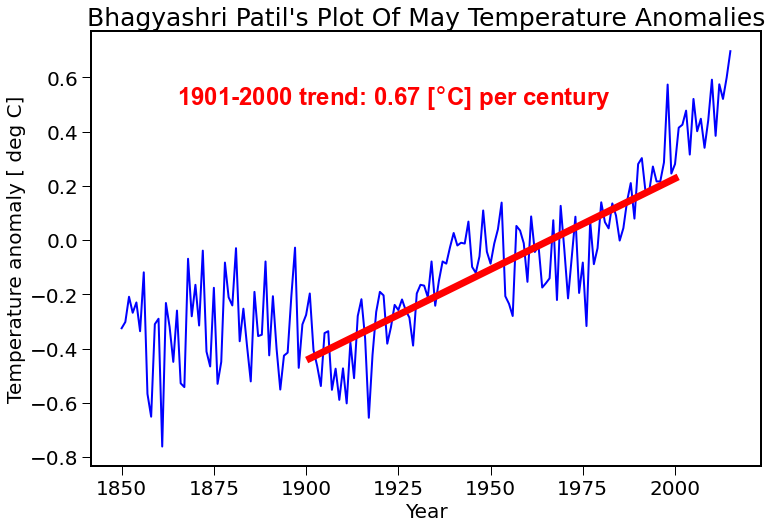

In [ ]:
#Plot the figure
import string

plt.plot(year, mayT, '-', color="blue", lw =2)
plt.title(string.capwords("Bhagyashri Patil's plot of May Temperature anomalies"))
plt.xlabel('Year')
plt.ylabel('Temperature anomaly [ deg C]')
          
plt.plot(x, p, '-', color="red", lw = 7)
font = {'family': 'arial',
        'color':  'red',
        'weight': 'bold',
        'size': 24,
        }
plt.text(1865, .5, '1901-2000 trend: 0.67 [$\degree$C] per century', 
         fontdict = font)

### Answer: (g)

In [ ]:
#(g) hottest and coldest 
print("Tmax=", np.max(y))
print("Tmin=", np.min(y))

Tmax= 0.573
Tmin= -0.655


In [ ]:
indexmax = np.where(y >= 0.5729)
indexmin = np.where(y <= -0.6549)
print("Hottest year=", x[indexmax])
print("Coldest year=", x[indexmin])

Hottest year= [1998.]
Coldest year= [1917.]


### Description (g): 
- ##### The hottest May temperature anomaly is 0.573 deg C and the coldest is -0.655 deg C.
- ##### The hottest May was 1998, and the coldest May was 1917. 

***

# Problem 2: Standardized SLP data at Darwin and Tahiti

- (a) For the monthly standardized sea level pressure (SLP) datasets PSTANDdarwin.txt and PSTANDtahiti.txt downloadable from Canvas’ Assignment/Final Exam block, use Python to generate a space-time data matrix A for January from 1951 to 2015 when treating Darwin and Tahiti as two spatial locations.
- (b) Use Python to compute the SVD of the above matrix A to output EOFs, PCs, and their corresponding SVD eigenvalues.
- (c) Use Python and dot product to verify that the two PCs are orthogonal to each other.
- (d) Use Python to plot the two PCs on the same figure, PC1 in red and PC2 in blue. Save your figure in a png file or any other figure format, and include the figure in your solution pdf file. You can use the Jupyter Notebook to directly download as a pdf file for all your code, figure and other output.

In [ ]:
import os
#/Users/bhagy/Downloads/data/data
os.chdir('/Users/bhagy/Desktop/MATH_596/Final Exam/FinalReal/FinalReal') # change directory
os.getcwd() # check the current directory

'C:\\Users\\bhagy\\Desktop\\MATH_596\\Final Exam\\FinalReal\\FinalReal'

In [ ]:
#read data
file = 'PSTANDtahiti.txt'
Pta = np.loadtxt(file, skiprows=0)
Pta.shape
#print(Pta)

(65, 13)

### Answer: (a)

In [ ]:
#(a) Sace-time data matrix A for January month from 1951 to 2015
# Set up File path
file = 'PSTANDdarwin.txt'
Pda = np.loadtxt(file, skiprows=0) #65X13 matrix
PdaJan = Pda[:,1]
file = 'PSTANDtahiti.txt'
Pta = np.loadtxt(file, skiprows=0) #65X13 matrix
PtaJan = Pta[:,1]
#print(PdaJan)
#print(PtaJan)

A = np.vstack((PdaJan,PtaJan))
print(A.shape) # (2, 65)
#print(A)

(2, 65)


### Answer: (b)

In [ ]:
#(b) SVD for A
# Compute SVD of A
svdptd_u, svdptd_s, svdptd_vh = np.linalg.svd(A,full_matrices=False)

print(svdptd_u)
print(svdptd_s)
print(svdptd_vh)

[[-0.53398872  0.8454916 ]
 [ 0.8454916   0.53398872]]
[11.44165051  8.0192664 ]
[[ 0.15673651 -0.11084392  0.04239304  0.03772499 -0.02566833  0.116288
   0.06845088 -0.19018394 -0.12445659  0.01672372 -0.01594571  0.19835155
   0.10656537 -0.02800236 -0.05989477 -0.14351334  0.16607063 -0.00350154
  -0.19913055 -0.10228682  0.02255729  0.03733648 -0.02061277  0.23024296
  -0.06728436  0.1244556  -0.0707849  -0.00622209 -0.06806237  0.03266942
   0.00622209  0.1322347  -0.35236553  0.03305892 -0.01789023  0.06922789
  -0.0703954   0.01244616  0.15945905 -0.00194453  0.06572834 -0.26291238
  -0.10812139 -0.01477919 -0.04355956  0.1011203   0.07545196 -0.29791682
   0.17812729  0.08128554  0.13184619  0.06533984 -0.01672372 -0.14079081
   0.02878037  0.15051344 -0.09606473  0.17073769  0.1166775  -0.15207045
   0.24268912  0.1166775  -0.02916987  0.12912266 -0.1015098 ]
 [-0.05049761 -0.09988234  0.06769827 -0.20198617  0.19810174 -0.1459412
   0.03218407  0.07935297 -0.18589272 -0.0144

### Answer: (c)

In [ ]:
#(c) Verify PC1 is orthogonal to PC2 computing the dot product
PC1 = svdptd_vh[0,:]
PC2 = svdptd_vh[1,:]
np.dot(PC1, PC2)
#-6.938893903907228e-18 this almost zero dot product means orthogonality

5.551115123125783e-17

### Answer: (d)

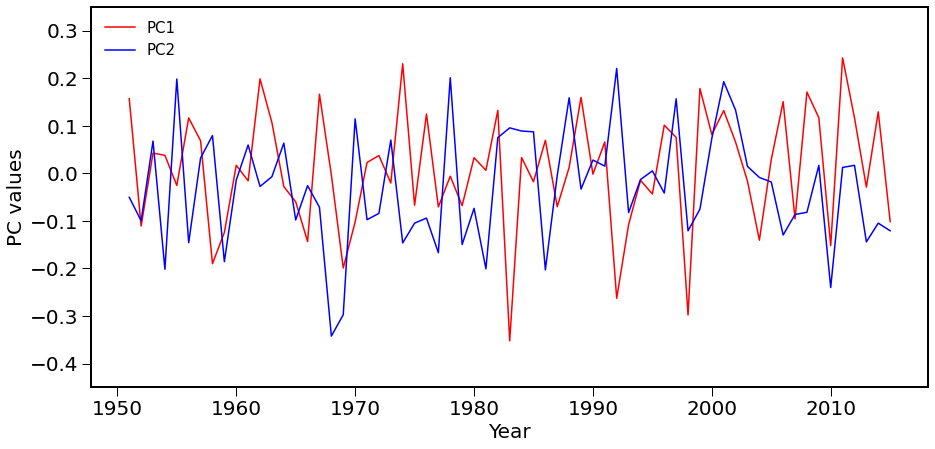

In [ ]:
#(d) Plot PC1 and PC2 on the same figure
# Prepare figure
plt.figure(figsize=(15,7))

# Make an array of years for our x-axis
xtime = np.arange(1951,2016)

# Plot data 
plt.plot(xtime, PC1,color='r', label = "PC1")
plt.xlabel('Year')
plt.ylabel('PC values')
plt.plot(xtime, PC2, color='blue', label = "PC2")
plt.legend(loc="upper left")
plt.ylim(-0.45, 0.35)
plt.show()

***

# Problem 3: Mount Mitchell

- (a) Following the numerical example on Page 181 in the textbook, repeat Elisa Mitchell’s calculation of the Mount Mitchell’s elevation based on the current weather data you can find online. Here, the “current” time means the time when you are working on this problem.
- (b) In your solution, please include the website URL address where you have found your data. Use at least 3 sentences to describe your procedure of obtaining the air pressure data. Please note that the formula use the air pressure at the location, not the sea level pressure.

### Answer: (a)

In [ ]:
#(a) 
z1 = 2702*0.3048
T1 = (42.8-32)*5/9 + 273.15
T2 = (45.7-32)*5/9 + 273.15
p1 = 927.6
p2 = 815.3
g = 9.80665
R = 287.055
z2 = z1 + ((2*R*T1*T2)/((g*(T1 + T2))))*(np.log(p1/p2))
print("Mt. Mitchell elevation is", round(z2/0.3048,2), 'feet.') # in feet

Mt. Mitchell elevation is 6171.4 feet.


### Answer (b) : Data source details:

- I searched and obtained my dataset from the North Carolina Climate Office website 
https://products.climate.ncsu.edu/cardinal/scout/?station=MITC.

- I obtained the data at December 17th, 3:24am local time. I first went to https://products.climate.ncsu.edu/

- Then I found the "Station Scout" button. Then I use the keyword 'BURN' as station ID said in the textbook to find the data for Burnville as the base station.

- The ID gave me two stations. The ECONET/Burnville Tower station was chosen.

- Clicked on Burnville Tower. The p1, T1 data appeared: p1 = 927.6 mb (note: not the sea level pressure), T1 = 42.8 deg F. In the Python code, we need to convert T1 into Kelvin.

- The base elevation at Burnville is 2,702 feet in the book. It needs to be converted into meters in the Python code.

- In the same way, I found the Mt. Mitchell data. I used the Mt Mitchell State Park station: p2 = 815.3 mb, T2 = 45.7 deg F.

***


# Problem 4: Eigenvector and diagrams

- (a) Use your own words, write down the definition of an eigenvector u of a matrix A.
- (b) Draw a diagram and use English text to explain the SVD formula A = UDV t from the perspective of space-time decomposition (limited to 50-200 words). Please answer this question for the case of a rectangular matrix A with more columns than rows.
- (c) Draw a diagram about the energy balance Equation (5.7) (see Page 115 of the textbook) for the Moon surface temperature, and use English text to explain the meaning of this equation (limited to 50-200 words).

### Answer (a) : Definition of an Eigenvector:

If the matrix A times a vector u does not change the direction of the vector u, then u is called an eigenvector of A. 

### Answer: (b)

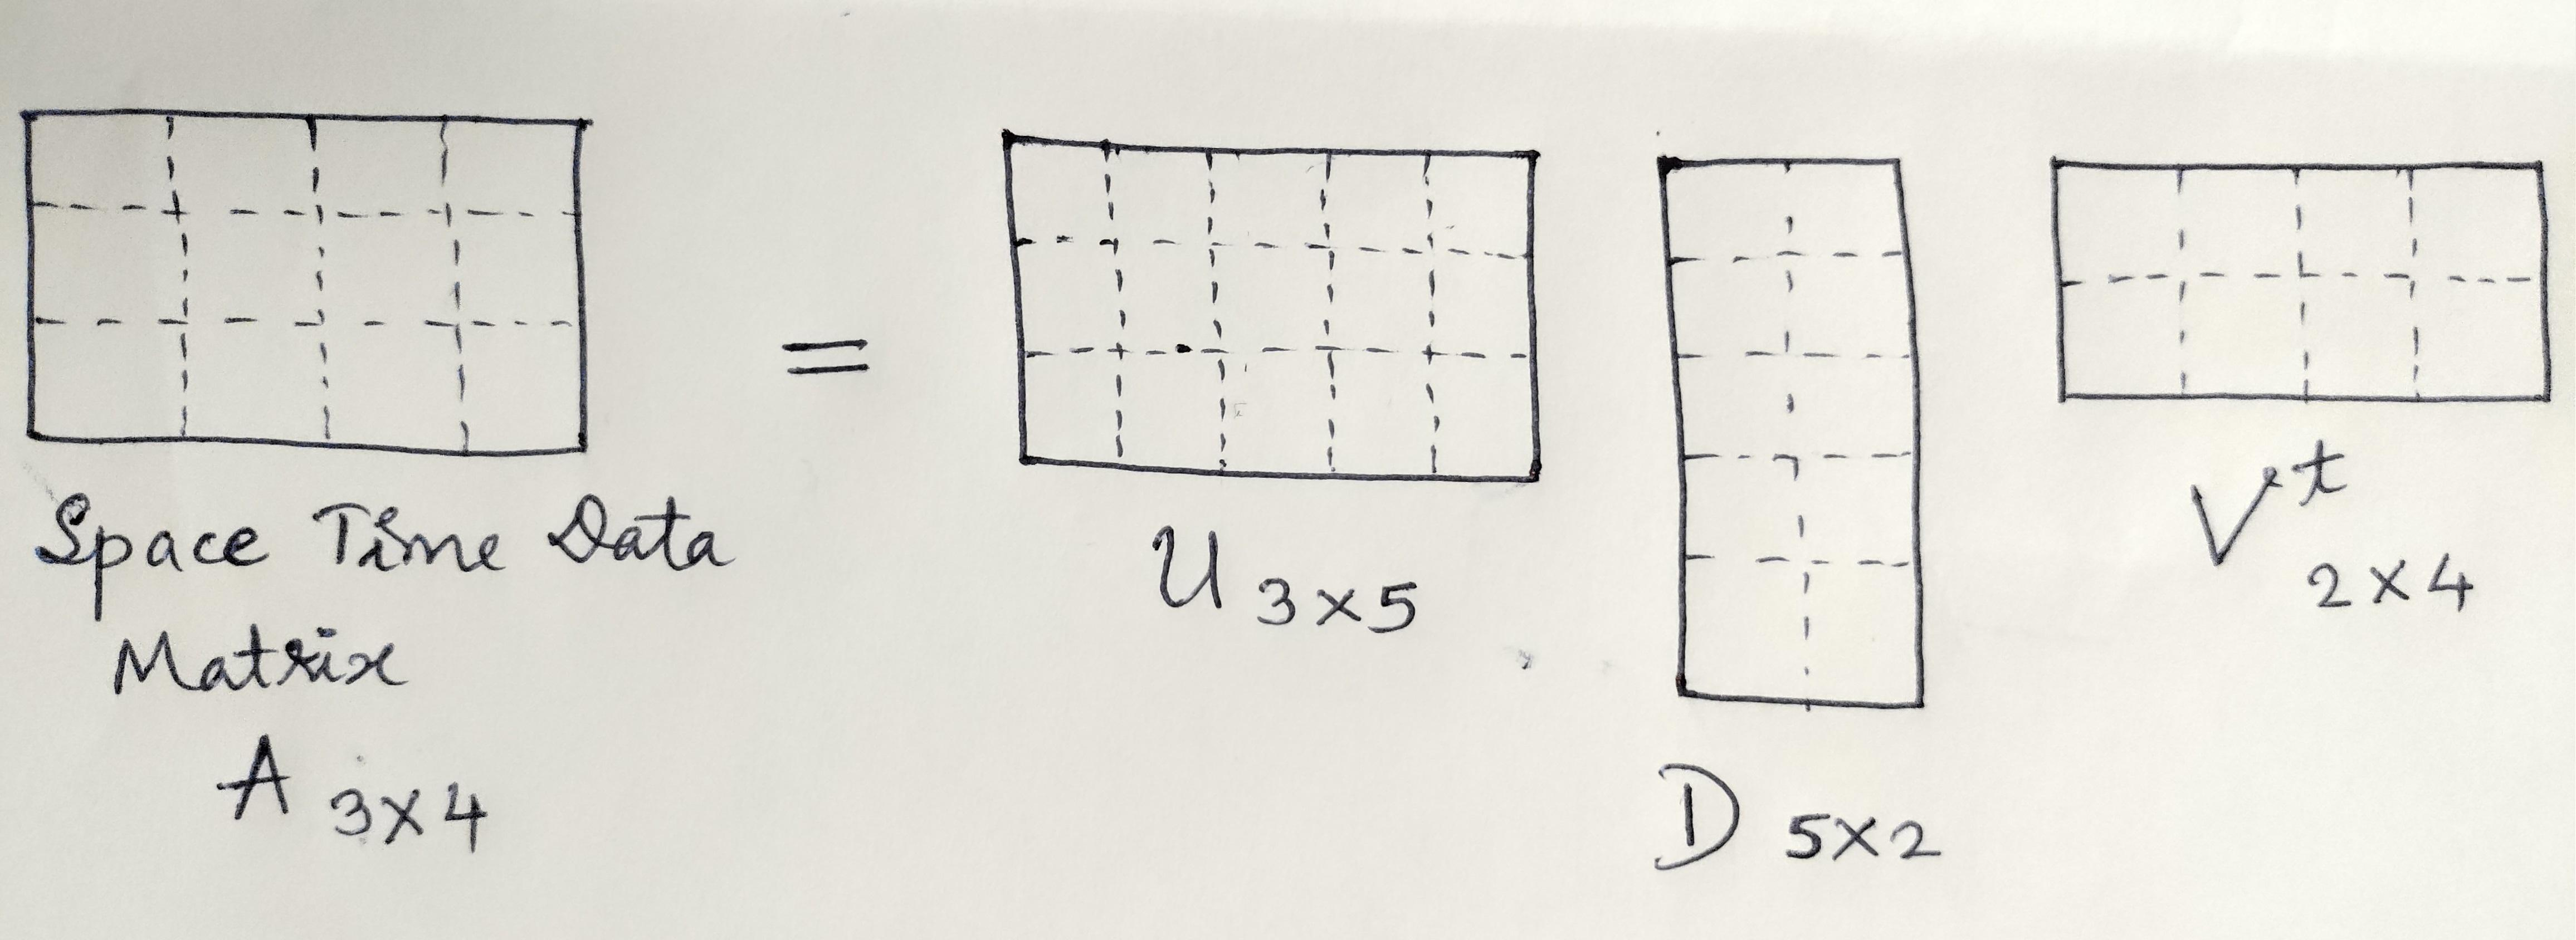

In [ ]:
#(b)  A diagram for SVD and interpretation
import IPython.display as display
from PIL import Image
img1 = Image.open("/Users/bhagy/Desktop/MATH_596/Final Exam/svd.jpg") 
img1.save('img1.jpg')
display.Image("img1.jpg", width = 700, height = 200)

### Definition:
A 3-by-4 space-time matrix A is decomposed into the space matrix U, time matrix V, and the digonal standard deviation matrix D. The SVD formula is:

#### $A = UDV^t$

where $V^t$ is the transpose of V.

- The column vectors of U are EOFs, and the column vectors of V are PCs.
- The elements of the diagonal matrix are the eigenvalues of the SVD decomposition. They measure the stadard deviations of the corresponding EOF modes.
- A EOF demonstrates the spatial pattern of a phenomenon, such as El Nino, which shows the warm temperature anomalies over the eastern tropical Pacific.
- The corresponding PC shows when the phenomenon occurs. For example, Dec 1983 had a strong El Nino. The PC had a large absolute value at the month.

### Answer: (c)

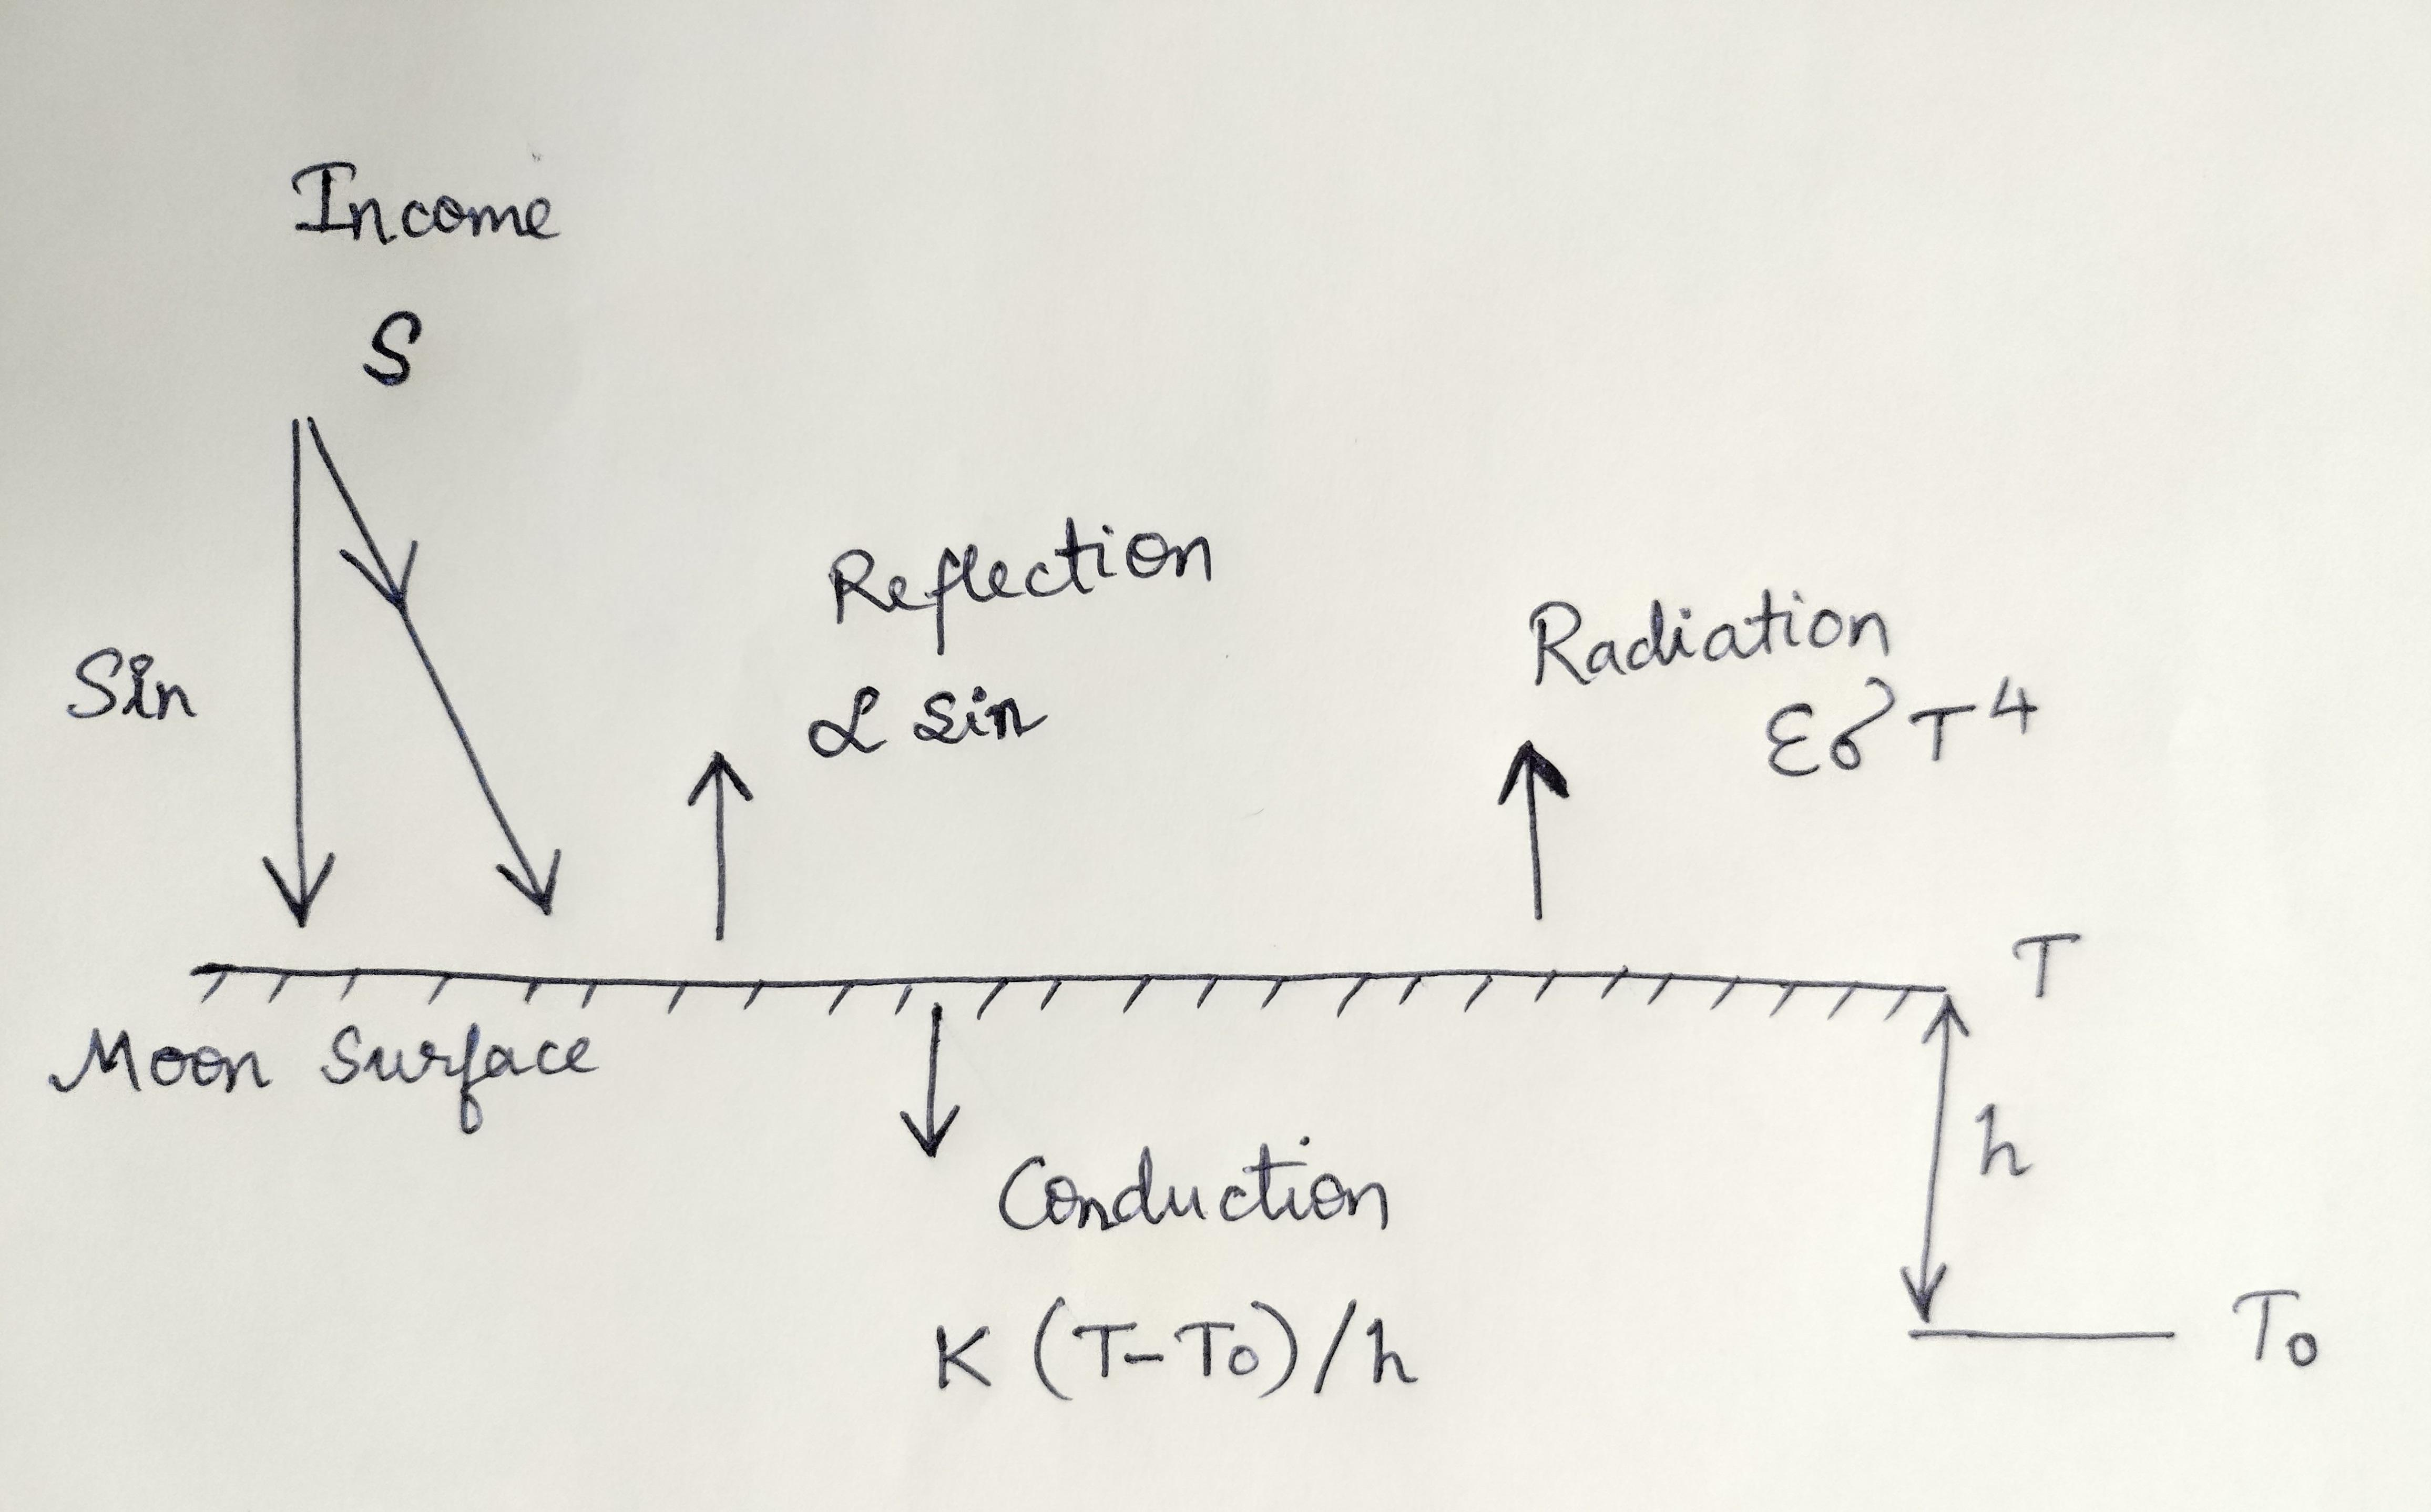

In [ ]:
#(c) A diagram for the EBM for Moon
from PIL import Image
img2 = Image.open("/Users/bhagy/Desktop/MATH_596/Final Exam/moon.jpg") 
img2.save('img2.jpg')
display.Image("img2.jpg", width = 600, height = 150)

### Definition:

- Equation (5.7) on Page 115 means the following energy balance. The left hand side $(1-\alpha)S \cos\phi$ means the incoming solar energy $S \cos\phi$ minus the reflected solar energy by the Moon's surface $\alpha S \cos\phi$, where $\phi$ is latitude, $S$ is the 
solar radiation, and $\alpha$ is the Moon's surface reflection constant.


- Note that this formula is for noon time. If it is not noon, then the angle of longitude must be considered. The longitude is related to the Moon's location time. Each hour means 15 degrees longitude. Thus, the left hand side means the net energy from the sun.


- The right hand side means the Moon's radiation following blackbody radiation formula: $\epsilon \sigma T^4$, where $\sigma$ is the Boltzmann constant, $T$ is the Moon surface temperature at the location, and $\epsilon$ is the Moon's emisivity.


- Another loss of the energy is through conduction: The heat energy goes down underneath the Moon's surface during the daytime and comes out at night: $\kappa (T-T_0)/h$. Here, $T_0$ is the temperature underneath the moon at depth $h$, and $\kappa$ is the heat conduction coefficient.


- Thus, the Moon's energy balance is that the solar energy to the Moon's sruface is equal to the sum of the Moon's heat radiation to the space and the heat conduction to the place underneath the Moon's surface. 

***

# Problem 5: Moon

- (a) Following Eqs. (5.1)-(5.7) in the textbook, develop an energy balance model for the Moon surface temperature at the location of latitude φ and longitude θ. The location of the noon time is considered the zero of the longitude.
- (b) Write a Python code to find the moon surface temperature at the location of φ = 45$^\circ$ and θ = 60$^\circ$ by solving the energy balance model.
- (c) What is the temperature in $^\circ$C for the location of φ = 45$^\circ$ and θ = 60$^\circ$ ?

### Answer (a) : Model set up

1. Regard the longitude zero as the noon time of a given Moon location\
then the solar energy reaching the moon surface at any latitude \
and longitude is 
 \begin{equation}
 S_{in} =  S \cos\phi \cos \theta
 \end{equation}
 
2. The energy lost include the energy reflected back to the space $S_r$ \
 the energy transmitted below the Moon's surface through conduction $E_{cond}$,\
 and Moon's radiation back to space $E_{bb}$.
 
 \begin{equation}
 S_{r} = \alpha S_{in}
 \end{equation}
 
\begin{equation}
 E_{cond}= \kappa \frac{T-T_0}{h}
 \end{equation}
 
 \begin{equation}
 E_{bb}= \epsilon \sigma T^4,
 \end{equation}
 
 3. Energy balance: Soloar in = reflection + conduction + radiation
 
\begin{equation}
S \cos\phi \cos \theta = \alpha S \cos\phi \cos \theta + \epsilon \sigma T^4 +  \kappa \frac{T-T_0}{h}.
\end{equation}
or

\begin{equation}
 \epsilon \sigma T^4 +  \kappa \frac{T-T_0}{h} - (1-\alpha)S \cos\phi \cos \theta =0
\end{equation}

 

### Answer (b) : Solve the nonlinear model equation using Python

In [ ]:
from scipy import optimize as opt

# Making a function to numerically solve an EBM
def ebm_maker(a, s, la, lo, e, si, ka, t0, he):
    """
    This function accept a set of Energy Balance Model parameters
    and returns a lambda function with those parameters as a function of t.
    """
    return lambda t: e*si*(t**4) + ka*(t - t0)/he - (1-a)*s*np.cos(la)*np.cos(lo)

In [ ]:
# Equator noon temperature of the moon from an EBM
lat = 45*np.pi/180
lon = 60*np.pi/180
sigma = 5.670367e-8
alpha = 0.12
S = 1368
ep = 0.98
k = 7.4e-4
h = 0.4
T0 = 260


fEBM = ebm_maker(alpha, S, lat, lon, ep, sigma, k, T0, h)

# Numerically solve the EBM: fEBM = 0 
res = opt.root(fEBM, x0 = 400)
x0 = res['x'][0]
print(x0)
print(x0-273.15)

295.82149438591154
22.671494385911558


### Answer (c) : Tempearure in deg C

The Temperature in $^\circ$C is 22.6 $^\circ$C at Latitude = 45 degree and Longitude = 60 degree. 

***

# Problem 6: NCEP Renalysis data, EOFs and PCs

- (a) For the NCEP Reanalysis temperature dataset air.mon.mean.nc downloadable from Canvas’ Assignment/Final Exam block, generate a space-time data matrix X for January temperature from 1951 to 2010 for all the grid boxes over the globe. Hint: See Section 10.3 of the textbook.
- (b) Compute the January climatology as the average in the period of 1951-2010 for each grid box using the space-time data matrix X. You do not need to print your data matrix X result. Just write your Python code, although you may show part of the the matrix X.
- (c) Compute the January standard deviation in the period of 1951-2010 for each grid box of the above space-time data matrix X.
- (d) Generate a standardized anomaly space-time data matrix Y using the results from (a) to (c).
- (e) Generate an area-weighted standardized anomaly space-time data matrix Z.
- (f) Use SVD to compute EOFs, PCs and eigenvalues of Z.
- (g) Use Python and dot product to verify that EOF1 and EOF2 are orthogonal.

### Answer (a) : Space-time data matrix

In [ ]:
#(a) Read data and make a space-time data matrix 
#Follow the code in Ch 10 for the same dataset

#Import Data
import os
import netCDF4 as nc
os.chdir("/Users/bhagy/Desktop/MATH_596/Final Exam/FinalReal/FinalReal") #Change working directory
ncd = nc.Dataset("air.mon.mean.nc")

#Download the following data set from NOAA into your active folder
#https://www.esrl.noaa.gov/psd/repository/entry/show?
#entryid=synth%3Ae570c8f9-ec09-4e89-93b4-babd5651e7a9%
#3AL25jZXAucmVhbmFseXNpcy5kZXJpdmVkL3N1cmZhY2UvYWlyLm1vbi5tZWFuLm5j

#ncd = nc.Dataset("air.mon.mean.nc","r+")

In [ ]:
#Define variables
lon_vals = ncd.variables['lon']
lat_vals = ncd.variables['lat']
time = ncd.variables['time']
air = ncd.variables['air']
time_unit = time.units
precnc = ncd.variables['air']
precnc.shape #826 months (Jan 1948-Oct 2016), 73 lat, 144 lon

(826, 73, 144)

In [ ]:
# define Variables 
precst = np.zeros((10512,826))

temp = np.reshape(precnc[0,:,:],(144*73))
print(np.shape(temp))
print(temp[0:6])

# create reshaping function
def spmat(x,y):
    for i in range(0,826):
        y[:,i] = np.reshape(x[i,:,:],(144*73))
    return y

# use fuction and save result
precst2 = spmat(precnc,precst)

print(np.shape(precst2))

# build lat and lon for 10512 spatial positions using rep
def rep(x,y,n):
    for j in range(0,n):
        x = np.append(x,y)
    return x

arra = np.zeros((0))
LAT = rep(arra,lat_vals,144)
LON = rep(arra,lon_vals[0],73)
print(LON)

# create reconstruct function
def recon():
    rslt = LON
    for jj in range(0,143):
        rslt = np.append(rslt,rep(arra,lon_vals[jj],73))
    return rslt
LON2 = recon()
print("The last 6 entries are:",LON2[-6:])

# creating an array with first two columns of lat and lon with 826 months spanning from 1948-2016
gpcpst_ = np.column_stack((LAT,(LON2)))
gpcpst = np.column_stack((gpcpst_,precst2))

(10512,)
[-34.926773 -34.926773 -34.926773 -34.926773 -34.926773 -34.926773]
(10512, 826)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
The last 6 entries are: [355. 355. 355. 355. 355. 355.]


In [ ]:
# create an array of all ones for the days of the data
ones = np.ones(826)

# define a function to create a list of months repeating to match the size of our data
def monthfunc():
    montharr = np.zeros(0)
    for i in range(1,71):
        for j in range(1,13):
             montharr = np.append(montharr,int(j))
    for k in range(1,6):
        montharr = np.append(montharr,int(k))
    return montharr

months = monthfunc()

# define a function to create a list of years to match the size of our data
def yearfunc():
    yeararr = np.zeros(0)
    for i in range(1948,2018):
        for j in range(1,13):
            yeararr = np.append(yeararr,i)
    for k in range(1,6):
        yeararr = np.append(yeararr,2018)
    return yeararr

years = yearfunc()

# define a function that pairs a string version of our year and
# month arrays with a dash in between these will serve as our column names for our data
def tmfunc():
    empty = np.zeros(0)
    for i in range(0,826):
        empty = np.append(empty,str(years[i])  + '-'  + str(months[i]))
    return empty

tm1 = tmfunc()

# add the 'Lat' and 'Lon' columns to the beginning of our column names array
tm2 = np.append(['Lat','Lon'],tm1)

In [ ]:
print(tm2[0:6])

['Lat' 'Lon' '1948.0-1.0' '1948.0-2.0' '1948.0-3.0' '1948.0-4.0']


In [ ]:
monJ = np.array(range(38,758,12)) #January months from 1951-2010
print(tm2[monJ]) #Verify the Jan index from 1951-2010
tm2[monJ].shape # Verify 60 years

['1951.0-1.0' '1952.0-1.0' '1953.0-1.0' '1954.0-1.0' '1955.0-1.0'
 '1956.0-1.0' '1957.0-1.0' '1958.0-1.0' '1959.0-1.0' '1960.0-1.0'
 '1961.0-1.0' '1962.0-1.0' '1963.0-1.0' '1964.0-1.0' '1965.0-1.0'
 '1966.0-1.0' '1967.0-1.0' '1968.0-1.0' '1969.0-1.0' '1970.0-1.0'
 '1971.0-1.0' '1972.0-1.0' '1973.0-1.0' '1974.0-1.0' '1975.0-1.0'
 '1976.0-1.0' '1977.0-1.0' '1978.0-1.0' '1979.0-1.0' '1980.0-1.0'
 '1981.0-1.0' '1982.0-1.0' '1983.0-1.0' '1984.0-1.0' '1985.0-1.0'
 '1986.0-1.0' '1987.0-1.0' '1988.0-1.0' '1989.0-1.0' '1990.0-1.0'
 '1991.0-1.0' '1992.0-1.0' '1993.0-1.0' '1994.0-1.0' '1995.0-1.0'
 '1996.0-1.0' '1997.0-1.0' '1998.0-1.0' '1999.0-1.0' '2000.0-1.0'
 '2001.0-1.0' '2002.0-1.0' '2003.0-1.0' '2004.0-1.0' '2005.0-1.0'
 '2006.0-1.0' '2007.0-1.0' '2008.0-1.0' '2009.0-1.0' '2010.0-1.0']


(60,)

In [ ]:
# use the package pandas.DataFrame to match the column names with the data
GPCPST = pd.DataFrame(gpcpst,columns=tm2)

monJ = np.array(range(38,758,12))  #January months from 1951-2010
gpcpdat = GPCPST.iloc[:,2:826] #data exclude lat and lon
gpcpJ = gpcpdat.iloc[:,monJ] #take Jan data 1948-2016: 69 yrs
gpcpJ.shape
#gpcpJ is the space-time data matrix (10512-by-60)

(10512, 60)

### Answer (b) : January climatology

In [ ]:
#(b) Compute the January climatology
climJ = gpcpJ.mean(axis=1)

climJ

0       -30.422847
1       -30.422847
2       -30.422847
3       -30.422847
4       -30.422847
           ...    
10507   -50.269635
10508   -50.269635
10509   -50.269635
10510   -50.269635
10511   -50.269635
Length: 10512, dtype: float64

### Answer (c) : January Standard deviation

In [ ]:
#(c) Compute the Jan standard deviation
# create desired functions
def rowSDS2():
    rslt = []
    for jj in range(0,10512):
        rslt = np.append(rslt,np.std(gpcpJ.iloc[jj,:]))
    return rslt

sdJ = gpcpJ.std(axis=1)

sdJ

0        3.481570
1        3.481570
2        3.481570
3        3.481570
4        3.481570
           ...   
10507    2.909154
10508    2.909154
10509    2.909154
10510    2.909154
10511    2.909154
Length: 10512, dtype: float64

### Answer (d) : Standardized anomaly space-time data matrix 

In [ ]:
#(d) Generate the standardized anomaly matrix 
def anomJ_func2():
    rslt = pd.DataFrame(np.zeros((10512, 60)),columns=tm1[monJ])
    for i in range(0,60):
        rslt.iloc[:,i] = (gpcpdat.iloc[:,monJ[i]]-climJ)/sdJ
    return rslt

anomJ = anomJ_func2()

anomJ

,1951.0-3.0,1952.0-3.0,1953.0-3.0,1954.0-3.0,1955.0-3.0,1956.0-3.0,1957.0-3.0,1958.0-3.0,1959.0-3.0,1960.0-3.0,...,2001.0-3.0,2002.0-3.0,2003.0-3.0,2004.0-3.0,2005.0-3.0,2006.0-3.0,2007.0-3.0,2008.0-3.0,2009.0-3.0,2010.0-3.0
0,1.660712,-0.982794,-1.727176,-1.457459,0.610945,-1.645268,0.616134,0.901414,0.433141,-1.665006,...,-0.461894,1.897349,0.214293,0.675431,0.354663,1.041230,0.655695,0.365503,0.463624,1.060964
1,1.660712,-0.982794,-1.727176,-1.457459,0.610945,-1.645268,0.616134,0.901414,0.433141,-1.665006,...,-0.461894,1.897349,0.214293,0.675431,0.354663,1.041230,0.655695,0.365503,0.463624,1.060964
2,1.660712,-0.982794,-1.727176,-1.457459,0.610945,-1.645268,0.616134,0.901414,0.433141,-1.665006,...,-0.461894,1.897349,0.214293,0.675431,0.354663,1.041230,0.655695,0.365503,0.463624,1.060964
3,1.660712,-0.982794,-1.727176,-1.457459,0.610945,-1.645268,0.616134,0.901414,0.433141,-1.665006,...,-0.461894,1.897349,0.214293,0.675431,0.354663,1.041230,0.655695,0.365503,0.463624,1.060964
4,1.660712,-0.982794,-1.727176,-1.457459,0.610945,-1.645268,0.616134,0.901414,0.433141,-1.665006,...,-0.461894,1.897349,0.214293,0.675431,0.354663,1.041230,0.655695,0.365503,0.463624,1.060964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,-2.008802,-1.487532,0.404827,-1.578456,-0.932554,-2.626874,0.199135,-0.264585,-1.406033,-1.224294,...,-0.112453,1.276600,-0.294082,0.960690,1.505687,1.270172,0.895268,1.481405,1.734333,1.899552
10508,-2.008802,-1.487532,0.404827,-1.578456,-0.932554,-2.626874,0.199135,-0.264585,-1.406033,-1.224294,...,-0.112453,1.276600,-0.294082,0.960690,1.505687,1.270172,0.895268,1.481405,1.734333,1.899552
10509,-2.008802,-1.487532,0.404827,-1.578456,-0.932554,-2.626874,0.199135,-0.264585,-1.406033,-1.224294,...,-0.112453,1.276600,-0.294082,0.960690,1.505687,1.270172,0.895268,1.481405,1.734333,1.899552
10510,-2.008802,-1.487532,0.404827,-1.578456,-0.932554,-2.626874,0.199135,-0.264585,-1.406033,-1.224294,...,-0.112453,1.276600,-0.294082,0.960690,1.505687,1.270172,0.895268,1.481405,1.734333,1.899552


### Answer (e) :  Area-weighted Standardized anomaly space-time data matrix

In [ ]:
#Time the area-weight to the anomaly matrix 
def anomJ_func3():
    rslt = pd.DataFrame(np.zeros((10512, 60)),columns=tm1[monJ])
    for i in range(0,60):
        rslt.iloc[:,i] = np.sqrt(np.cos(GPCPST.iloc[:,0]*np.pi/180.))*anomJ.iloc[:,i]
    return rslt
        
anomAW = anomJ_func3()

anomAW

,1951.0-3.0,1952.0-3.0,1953.0-3.0,1954.0-3.0,1955.0-3.0,1956.0-3.0,1957.0-3.0,1958.0-3.0,1959.0-3.0,1960.0-3.0,...,2001.0-3.0,2002.0-3.0,2003.0-3.0,2004.0-3.0,2005.0-3.0,2006.0-3.0,2007.0-3.0,2008.0-3.0,2009.0-3.0,2010.0-3.0
0,1.299525e-08,-7.690471e-09,-1.351534e-08,-1.140478e-08,4.780711e-09,-1.287440e-08,4.821313e-09,7.053667e-09,3.389374e-09,-1.302885e-08,...,-3.614373e-09,1.484696e-08,1.676865e-09,5.285325e-09,2.775273e-09,8.147736e-09,5.130888e-09,2.860098e-09,3.627907e-09,8.302159e-09
1,3.468439e-01,-2.052590e-01,-3.607251e-01,-3.043941e-01,1.275974e-01,-3.436184e-01,1.286811e-01,1.882627e-01,9.046256e-02,-3.477407e-01,...,-9.646779e-02,3.962661e-01,4.475562e-02,1.410656e-01,7.407217e-02,2.174635e-01,1.369437e-01,7.633616e-02,9.682902e-02,2.215850e-01
2,4.902779e-01,-2.901419e-01,-5.098995e-01,-4.302733e-01,1.803641e-01,-4.857185e-01,1.818959e-01,2.661169e-01,1.278725e-01,-4.915455e-01,...,-1.363611e-01,5.601382e-01,6.326388e-02,1.994019e-01,1.047040e-01,3.073934e-01,1.935754e-01,1.079042e-01,1.368717e-01,3.132194e-01
3,5.999888e-01,-3.550678e-01,-6.240012e-01,-5.265568e-01,2.207247e-01,-5.944092e-01,2.225993e-01,3.256667e-01,1.564869e-01,-6.015401e-01,...,-1.668750e-01,6.854819e-01,7.742062e-02,2.440226e-01,1.281339e-01,3.761797e-01,2.368923e-01,1.320503e-01,1.674999e-01,3.833094e-01
4,6.920371e-01,-4.095412e-01,-7.197335e-01,-6.073395e-01,2.545876e-01,-6.856016e-01,2.567497e-01,3.756294e-01,1.804946e-01,-6.938265e-01,...,-1.924765e-01,7.906464e-01,8.929824e-02,2.814598e-01,1.477918e-01,4.338920e-01,2.732356e-01,1.523090e-01,1.931972e-01,4.421155e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,-8.370900e-01,-6.198713e-01,1.686960e-01,-6.577602e-01,-3.886057e-01,-1.094648e+00,8.298196e-02,-1.102554e-01,-5.859095e-01,-5.101770e-01,...,-4.686056e-02,5.319734e-01,-1.225472e-01,4.003304e-01,6.274366e-01,5.292948e-01,3.730683e-01,6.173180e-01,7.227158e-01,7.915644e-01
10508,-7.257481e-01,-5.374217e-01,1.462576e-01,-5.702710e-01,-3.369169e-01,-9.490479e-01,7.194447e-02,-9.559024e-02,-5.079772e-01,-4.423180e-01,...,-4.062760e-02,4.612152e-01,-1.062471e-01,3.470822e-01,5.439808e-01,4.588929e-01,3.234462e-01,5.352081e-01,6.265868e-01,6.862779e-01
10509,-5.930414e-01,-4.391515e-01,1.195137e-01,-4.659942e-01,-2.753100e-01,-7.755098e-01,5.878907e-02,-7.811109e-02,-4.150911e-01,-3.614380e-01,...,-3.319865e-02,3.768797e-01,-8.681927e-02,2.836165e-01,4.445113e-01,3.749821e-01,2.643025e-01,4.373426e-01,5.120123e-01,5.607886e-01
10510,-4.195433e-01,-3.106749e-01,8.454917e-02,-3.296646e-01,-1.947663e-01,-5.486294e-01,4.158994e-02,-5.525919e-02,-2.936535e-01,-2.556969e-01,...,-2.348617e-02,2.666211e-01,-6.141973e-02,2.006426e-01,3.144666e-01,2.652787e-01,1.869791e-01,3.093952e-01,3.622198e-01,3.967262e-01


### Answer (f) : SVD to compute EOFs, PCs and Eigenvalues of area-weighted anomalies

In [ ]:
#(e) SVD for the area-weighted anomalies

# computing SVD from the area-weighted anomaly matrix anomAW
U, S, Vh = np.linalg.svd(anomAW,full_matrices=False)
#Columns of U are EOFs and rows of Vh are PCs, and S are eigenvalues
print(U.shape,S.shape,Vh.shape)

(10512, 60) (60,) (60, 60)


### Answer (g) : Dot product to verify that EOF1 and EOF2 are orthogonal.

In [ ]:
#(f) Verify the orthogonality of EOF1 and EOF2

EOF1 = svdptd_u[0,:]
EOF2 = svdptd_u[1,:]
np.dot(EOF1, EOF2)
#The almost zero result implies orthogonality.

0.0

#### Answer: Here, as the Dot product of the EOF1 and EOF2 are 0.0, we can conclude that the EOF1 and EOF2 are Orthogonal.

***